# Perturbation of Eigenvalues and Eigenvectors
### Hayden Ringer
#### Math 521

A key problem in numerical linear algebra is the calculation of eigenvalues and eigenvectors for a matrix $A$. The realities of floating-point arithmetic guarantee that round-off error (both in the input to an algorithm and in the implementation of an algorithm) will be non-trivial. Although eigenvalues and eigenvectors are, in general, given as continuous functions of the entries of a matrix, the response of these outputs can be very nonlinear.

Perturbation theory gives good insight into how eigenvalues and eigenvectors behave under $\epsilon$-perturbations to the matrix itself. This differs from the classical application of perturbation theory (in studying the solutions of differential equations involving extreme values of a parameter) in that we seek primarily to bound the change in the eigenvalues and eigenvectors as a function of $\epsilon$, rather than to give explicit asymptotic expansions (which always depend on the matrix $A$ and the perturbing matrix $F$). However, explicit two-term expansions can be derived, and examples will be shown to give visual intuition for the behavior.

As eigenvalues are given as the roots of the characteristic polynomial of $A$, there is some similarity to studying perturbation theory for polynomial roots. However, as the characteristic polynomial is given by $det(A-\lambda I)$, it is not useful in practice to study the characteristic polynomial directly.

## 1. Basic Form

The simplest case is for a matrix with a simple eigenvalue $\lambda$. The guarantees that the eigenspace will be one-dimensional. Suppose $A$ is $n \times n$ with complex entries, and that $Ax=\lambda x$ and $y^\mathsf{H}A=\lambda y^\mathsf{H}$. Furthermore, take the eigenvectors to be norm 1: $\|x\|= \|y\|=1$. Consider the perturbed problem:

$$(A+\epsilon F)x(\epsilon)=\lambda(\epsilon)x(\epsilon) \quad \|F\|_2 = 1, \|x(\epsilon)\|=1$$

where we expand $\lambda(\epsilon)$ and $x(\epsilon)$ asymptotically as

$$\lambda(\epsilon) = \lambda + \epsilon\lambda_1 + \mathcal{O}(\epsilon^2) \quad x(\epsilon) = x + \epsilon x_1 + \mathcal{O}(\epsilon^2)$$

In this case, $F$ represents the perturbation direction in matrix-space. Plugging the expansions into the perturbed equation, and then matching terms on the order of $\epsilon$ gives

$$(A+\epsilon F)(x + \epsilon x_1 + ...) =(\lambda + \epsilon\lambda_1 + ...)(x+ \epsilon x_1 + ...)$$


\begin{align*}
	& \mathcal{O}(1): \quad Ax=\lambda x\\\
	& \mathcal{O}(\epsilon): \quad Ax_1 + Fx = \lambda_1x + \lambda x_1
\end{align*}

As usual, the $\mathcal{O}(1)$ equation is the unperturbed problem. For now, we seek to find $\lambda_1$. Multiplying both sides of the $\mathcal{O}(\epsilon)$ equation by $y^\mathsf{H}$ gives

$$y^\mathsf{H}Ax_1 + y^\mathsf{H}Fx = \lambda_1y^\mathsf{H}x + \lambda y^\mathsf{H}x_1$$

Since $y^\mathsf{H}A = \lambda y^\mathsf{H}$:
\begin{align}
\begin{split}
\lambda y^\mathsf{H}x_1 + y^\mathsf{H}Fx &= \lambda_1y^\mathsf{H}x + \lambda y^\mathsf{H}x_1 \\
y^\mathsf{H}Fx &= \lambda_1y^\mathsf{H}x \\
\lambda_1 &= \frac{y^\mathsf{H}Fx}{y^\mathsf{H}x}
\end{split}
\end{align}

Since $1 = \|F\|_2 = \|x\|= \|y\|$:

$$\vert \lambda_1 \vert \leq \frac{1}{\vert y^\mathsf{H}x \vert} := \kappa(\lambda)$$

The latter quantity (which is independent of $\epsilon$ and $F$) is called the *condition number* of $\lambda$. It follows that, for sufficiently small $\epsilon$

$$\vert \lambda(\epsilon) - \lambda \vert \leq \kappa(\lambda)\epsilon$$

In other words, $\kappa(\lambda)$ is the multiplier on perturbations to the matrix entries. When $A$ is symmetric, or more generally normal, we have that $y^\mathsf{H}x = 1$. Thus $\epsilon$-perturbations to a normal matrix produce $\epsilon$-perturbations to its simple eigenvalues.

The following code plots the true $\lambda(\epsilon)$ against the asymptotic expansion for $\epsilon \in [0,.5]$ for a randomly generated $3\times 3$ $A$ and $F$.

In [1]:
# packages
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D

# define A and F (originally drawn randomly)
# n = 3
# A = 2*np.random.rand(n,n)-1
# F = 2*np.random.rand(n,n)-1
# F = F/la.norm(F,ord=2)
A = np.array([[ 0.74576208, -0.25155087,  0.98232235],
              [ 0.87953816, -0.29472513, -0.31898235],
              [-0.04446363,  0.31389439, -0.58426845]])
F = np.array([[ 0.53134388, -0.26144232, -0.21504138],
              [-0.48435756,  0.4560706,   0.18815726],
              [ 0.28480286, -0.27596186, -0.0077198 ]])

In [2]:
%matplotlib notebook

True True


<IPython.core.display.Javascript object>


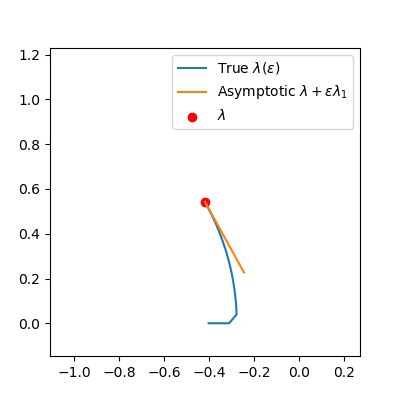

In [3]:
# extract eigenvalues, left- and right-eigenvectors of A
w, vl, vr = la.eig(A,left=True)

# check if the diagonalization is within tolerance
print(np.allclose(A@vr,vr@np.diag(w)), np.allclose(A.T@vl,vl@np.diag(w.conj())))

# define perturbed problem for first eigenpair
lam,x,yH = w[1],vr[:,1],vl[:,1].conj()

# calculate asymptotic expansion
eps_max = .5
epsilons = np.linspace(0,eps_max,100)
kappa = 1/abs(yH@x)
cond = eps_max/abs(yH@x)
lam_asym = lam + epsilons*(yH@(F@x))/(yH@x)

# numerical calculation of exact eigenvalue
lambdas = [lam]
for i,e in enumerate(epsilons[1:]):
    w = la.eig(A+e*F)[0]
    idx = np.argmin(np.abs(w-lambdas[i]))
    lambdas.append(w[idx])
lambdas = np.array(lambdas)

fig = plt.figure(figsize=(4,4))    
plt.plot(lambdas.real,lambdas.imag,label='True $\lambda(\epsilon)$')
plt.plot(lam_asym.real,lam_asym.imag,label='Asymptotic $\lambda+\epsilon\lambda_1$')
plt.scatter(lam.real,lam.imag,marker='o',c='red',label='$\lambda$')
plt.xlim((lam.real-cond,lam.real+cond))
plt.ylim((lam.imag-cond,lam.imag+cond))
plt.legend()
plt.show()

It appears that the asymptotic approximation does well near $\lambda$, but it is unclear on such a plot if the asymptotic expansion matches the true perturbation in more than the direction in the complex plane. Thus we plot the real and imaginary parts as a function of epsilon on the same plots.

<IPython.core.display.Javascript object>


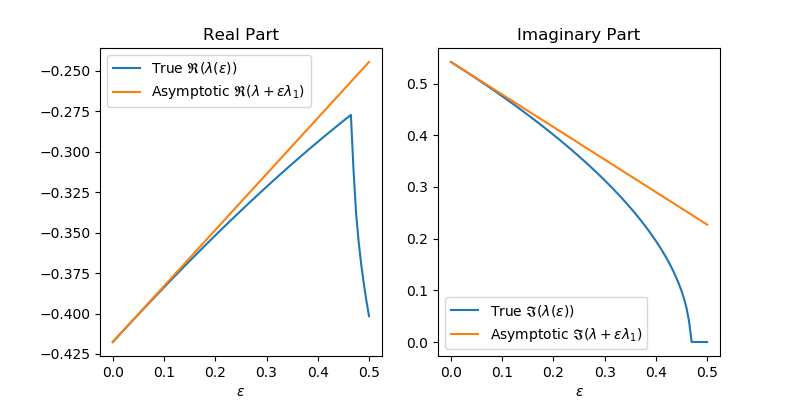

In [4]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(1,2,1)
ax1.plot(epsilons,lambdas.real,c='C0',label='True $\mathfrak{R}(\lambda(\epsilon))$')
ax1.plot(epsilons,lam_asym.real,c='C1',label='Asymptotic $\mathfrak{R}(\lambda+\epsilon\lambda_1)$')
plt.legend()
plt.title("Real Part")
plt.xlabel('$\epsilon$')
ax2 = fig.add_subplot(1,2,2)
ax2.plot(epsilons,lambdas.imag,c='C0',label='True $\mathfrak{I}(\lambda(\epsilon))$')
ax2.plot(epsilons,lam_asym.imag,c='C1',label='Asymptotic $\mathfrak{I}(\lambda+\epsilon\lambda_1)$')
plt.legend()
plt.title("Imaginary Part")
plt.xlabel('$\epsilon$')
plt.show()

Here we can see that the approximation is valid through $\epsilon = .3$. At $\epsilon \approx .46$, we can see that the true curve loses differentiability, as a conjugate pair of eigenvalues merge and become a repeated real eigenvalue. We will explore the case of a repeated eigenvalue later. We now produce an animation showing the true pertubation and the asymptotic expansion.

In [6]:
plt.ioff()
fig = plt.figure(figsize=(4,4))
truet, = plt.plot([],[],c='C0')
truep, = plt.plot([],[],c='C0',marker='o',label='True $\lambda(\epsilon)$')
asymt, = plt.plot([],[],c='C1')
asymp, = plt.plot([],[],c='C1',marker='o',label='Asymptotic $\lambda+\epsilon\lambda_1$')
plt.xlim((lam.real-cond,lam.real+cond))
plt.ylim((lam.imag-cond,lam.imag+cond))
plt.legend()

def update(i):
    plt.title(f'$\epsilon=${epsilons[i]:.3f}')
    truet.set_data(lambdas[:i+1].real,lambdas[:i+1].imag)
    truep.set_data(lambdas[i].real,lambdas[i].imag)
    asymt.set_data(lam_asym[:i+1].real,lam_asym[:i+1].imag)
    asymp.set_data(lam_asym[i].real,lam_asym[i].imag)
    return truet,
    
ani = animation.FuncAnimation(fig,update,frames=len(epsilons),interval=25)
ani.save('eig_ani1.gif')

MovieWriter ffmpeg unavailable. Trying to use pillow instead.


<video src='eig_ani1.mp4' controls loop>

Here we can see that the expansion is very good for $\epsilon < .3$.

As mentioned before, $\kappa(\lambda) := \frac{1}{\vert y^\mathsf{H}x \vert}$ gives a good estimate to bound the perturbation of the eigenvalue for small $\epsilon$. For the eigenvalue $\lambda \approx -.417 + .542i$, $\kappa(\lambda) \approx 1.38$. Below we animate a family of perturbations to $\lambda$, along with a circle around $\lambda$ of radius $\epsilon \kappa(\lambda)$.

In [33]:
# generate perturbation matrices
n = 5
perturbations = []
for i in range(n):
    F = F = 2*np.random.rand(3,3)-1
    F = F/la.norm(F,ord=2)
    perturbations.append(F)

# calculate the true perturbations
lambdas = np.zeros((n,len(epsilons)),dtype='complex')
lambdas[:,0] = lam
for i,e in enumerate(epsilons[1:]):
    for j,F in enumerate(perturbations):
        w = la.eig(A+e*F)[0]
        idx = np.argmin(np.abs(w-lambdas[j,i]))
        lambdas[j,i+1] = w[idx]

In [35]:
# create animation
plt.ioff()
fig = plt.figure(figsize=(4,4))
plt.xlim((lam.real-cond,lam.real+cond))
plt.ylim((lam.imag-cond,lam.imag+cond))
traj = [plt.plot([],[],c=f'C{i}')[0] for i in range(n)]
pts = [plt.plot([],[],c=f'C{i}',marker='o')[0] for i in range(n)]
circ, = plt.plot([],[],c='red',label='$z = \lambda + \epsilon\kappa(\lambda)$')
plt.legend()
theta = np.linspace(0,2*np.pi,100)
circle = np.exp(1j*theta)

def update(i):
    plt.title(f'$\epsilon=${epsilons[i]:.3f}')
    circ.set_data((lam+epsilons[i]*circle).real,(lam+epsilons[i]*circle).imag)
    for j,l in enumerate(zip(traj,pts)):
        l[0].set_data(lambdas[j,:i+1].real,lambdas[j,:i+1].imag)
        l[1].set_data(lambdas[j,i].real,lambdas[j,i].imag)
    return circ

ani = animation.FuncAnimation(fig,update,frames=len(epsilons),interval=25)
ani.save('eig_ani2.mp4')

<video src='eig_ani2.mp4' controls loop>

It can be clearly seen that for sufficiently small $\epsilon$, the condition number indeed gives a good bound on the perturbation to the eigenvalue.

## Repeated Eigenvalue

When an eigenvalue is repeated, the resulting perturbed problem becomes very ill-conditioned, as illustrated by the following example (adapted from Golub and Van Loan's *Matrix Computations* (pg 345)):

$$A = \begin{bmatrix} 1 & -.5 \\ 0 & 1 \end{bmatrix} \quad F = \begin{bmatrix} 0 & 0 \\ 1 & 0 \end{bmatrix}$$

$A$ has a repeated eigenvalue of $1$, but is a defective matrix and has a single right-eigenvector $x = [1,0]^\mathsf{T}$ and a single left-eigenvector $y = [0,1]^\mathsf{T}$. Thus $x$ and $y$ are orthogonal, and $\kappa(\lambda) = \infty$ The repeated eigenvalue problem is infinitely ill-conditioned. In fact, $A+\epsilon F$ has eigenvalues $\lambda = 1 \pm \sqrt{2\epsilon}i$. The following plot displays this ill-conditioning and the failure of the asymptotic expansion to provide insight.

True True


<IPython.core.display.Javascript object>


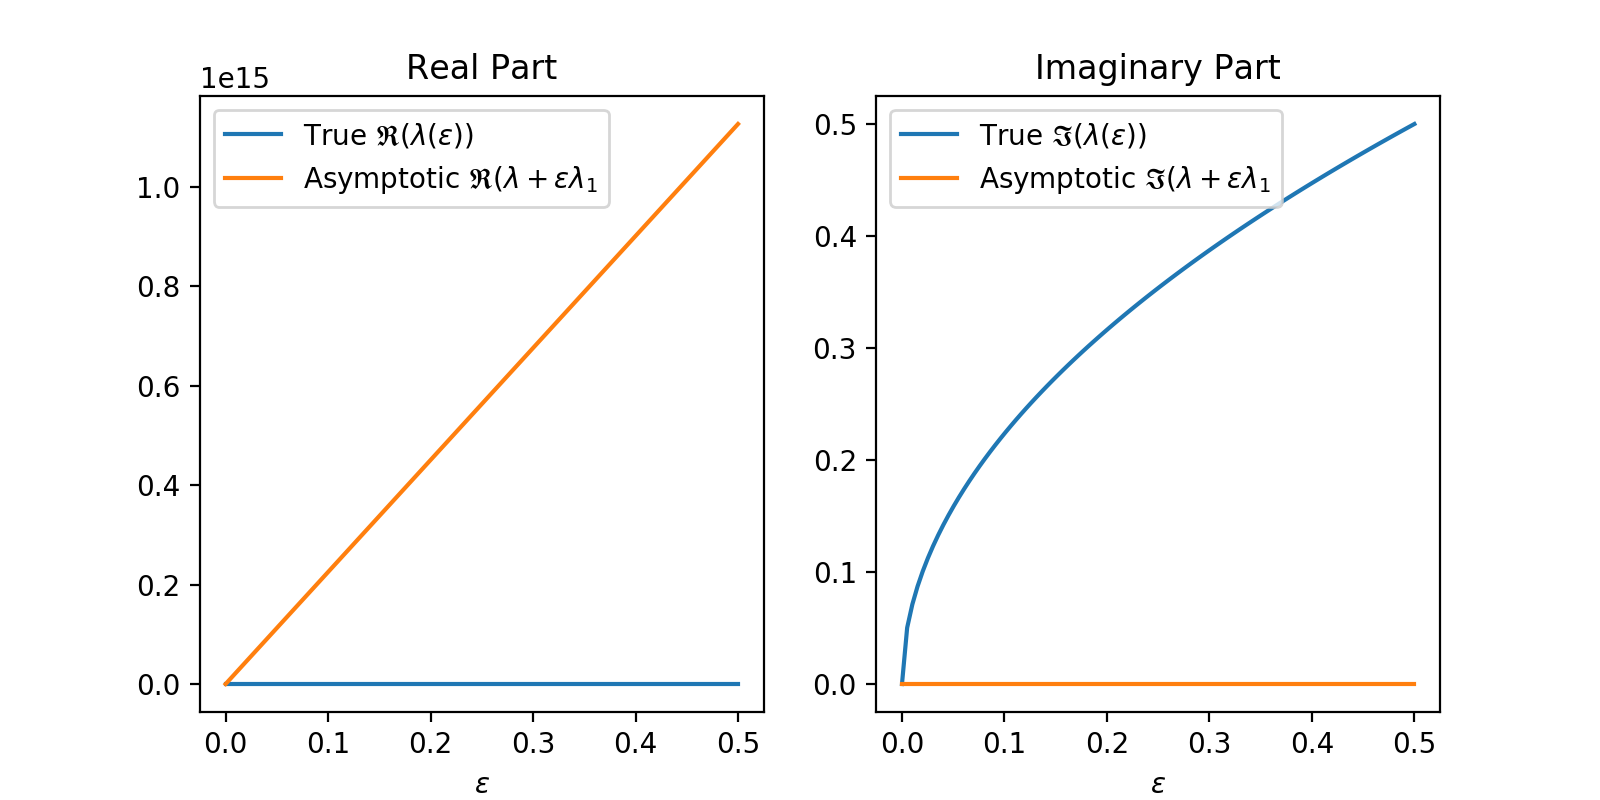

In [47]:
A = np.array([[1,-.5],[0,1]])
F = np.array([[0,0],[1,0]])
# extract eigenvalues, left- and right-eigenvectors of A
w, vl, vr = la.eig(A,left=True)

# check if the diagonalization is within tolerance
print(np.allclose(A@vr,vr@np.diag(w)), np.allclose(A.T@vl,vl@np.diag(w.conj())))

# define perturbed problem for first eigenpair
lam,x,yH = w[1],vr[:,1],vl[:,1].conj()

# calculate asymptotic expansion
eps_max = .5
epsilons = np.linspace(0,eps_max,100)
kappa = 1/abs(yH@x)
cond = eps_max/kappa
lam_asym = lam + epsilons*(yH@(F@x))/(yH@x)

# numerical calculation of exact eigenvalue
lambdas = [lam]
for i,e in enumerate(epsilons[1:]):
    w = la.eig(A+e*F)[0]
    idx = np.argmin(np.abs(w-lambdas[i]))
    lambdas.append(w[idx])
lambdas = np.array(lambdas)

plt.ion()
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(1,2,1)
ax1.plot(epsilons,lambdas.real,c='C0',label='True $\mathfrak{R}(\lambda(\epsilon))$')
ax1.plot(epsilons,lam_asym.real,c='C1',label='Asymptotic $\mathfrak{R}(\lambda+\epsilon\lambda_1$')
plt.legend()
plt.title("Real Part")
plt.xlabel('$\epsilon$')
ax2 = fig.add_subplot(1,2,2)
ax2.plot(epsilons,lambdas.imag,c='C0',label='True $\mathfrak{I}(\lambda(\epsilon))$')
ax2.plot(epsilons,lam_asym.imag,c='C1',label='Asymptotic $\mathfrak{I}(\lambda+\epsilon\lambda_1$')
plt.legend()
plt.title("Imaginary Part")
plt.xlabel('$\epsilon$')
plt.show()

## Perturbation of Eigenvectors

To analyze the sensitivity of eigenvectors to perturbation, we return to the $\mathcal{O}(\epsilon)$ equation in the first section. We also mirror the treatment found in Golub and Van Loan (pg. 346).

$$Ax_1 + Fx = \lambda_1x + \lambda x_1$$

Since the eigenvectors of A form a basis, we can write $x_1$ in terms of the eigenbasis $\{x^{(1)},x^{(2)},...,x^{(n)}\}$ (taking $x^{(1)} := x$, the eigenvector in consideration):


$$x_1 = \sum_{i=1}^{n} a_i x^{(i)}$$

Plugging into the first equation gives:
\begin{align}
\begin{split}
A(\sum_{i=1}^{n} a_i x^{(i)}) + Fx &= \lambda_1x + \lambda \sum_{i=1}^{n} a_i x^{(i)} \\
\sum_{i=1}^{n} a_i \lambda^{(i)} x^{(i)} +Fx &= \lambda_1x + \lambda \sum_{i=1}^{n} a_i x^{(i)} \\
\sum_{i=2}^{n} a_i (\lambda^{(i)}-\lambda) x^{(i)} +Fx &= \lambda_1x
\end{split}
\end{align}

Left- and right-eigenvectors corresponding to different eigenvalues are orthogonal, so multiplying by each left-eigenvector in turn allows us to get:

$$a_i = \frac{y_{i}^\mathsf{H}Fx}{(\lambda^{(i)}-\lambda)y_{i}^\mathsf{H}x^{(i)}}$$

Thus:

$$x_1 = \sum_{i=2}^{n} \frac{y_{i}^\mathsf{H}Fx}{(\lambda^{(i)}-\lambda)y_{i}^\mathsf{H}x^{(i)}}x^{(i)}$$

So the two-term expansion for the eigenvector perturbation is:

$$x(\epsilon) \approx x + \epsilon\sum_{i=2}^{n} \frac{y_{i}^\mathsf{H}Fx}{(\lambda^{(i)}-\lambda)y_{i}^\mathsf{H}x^{(i)}}x^{(i)}$$

The key observation is that the sensitivity of an eigenvector depends on the sensitivity of the eigenvalues (notice the $\frac{1}{y_{i}^\mathsf{H}x^{(i)}}$ term) and how close the corresponding eigenvalue is to the other eigenvalues of A (from the $\lambda^{(i)}-\lambda$ term in the denominator). Golub an Van Loan make the observation that "eigenvectors associated with nearby eigenvalues are 'wobbly'". We conclude with an 3D animation for the original example, showing how all three eigenvectors respond to perturbation.

In [77]:
A = np.array([[ 0.74576208, -0.25155087,  0.98232235],
              [ 0.87953816, -0.29472513, -0.31898235],
              [-0.04446363,  0.31389439, -0.58426845]])
F = np.array([[ 0.53134388, -0.26144232, -0.21504138],
              [-0.48435756,  0.4560706,   0.18815726],
              [ 0.28480286, -0.27596186, -0.0077198 ]])

w, v = la.eig(A)

for j in range(3):
    v[:,j] = v[:,j]*np.sign(v[0,j])

eps_max = .5
epsilons = np.linspace(0,eps_max,100)

# numerical calculation of exact eigenvalues and eigenvectors
lambdas = np.zeros((3,len(epsilons)),dtype='complex')
lambdas[:,0] = w
vecs = np.zeros((3,3,len(epsilons)),dtype='complex')
vecs[:,:,0] = v
for i,e in enumerate(epsilons[1:]):
    w, v = la.eig(A+e*F)
    for j in range(3):
        idx = np.argmin(np.abs(w-lambdas[j,i]))
        lambdas[j,i+1] = w[idx]
        vecs[j,:,i+1] = v[:,idx]*np.sign(v[0,idx])

In [78]:
plt.ioff()
fig = plt.figure(figsize=(10,3))
ax1 = fig.add_subplot(1,3,1,projection='3d')
ax1.set_xlim3d([-1,1])
ax1.set_ylim3d([-1,1])
ax1.set_zlim3d([-1,1])
rvec = [ax1.plot([],[],c=f'C{i}',label=f'Eigenvector {i}')[0] for i in range(3)]
plt.title('Eigenvector real part')
ax2 = fig.add_subplot(1,3,2,projection='3d')
ax2.set_xlim3d([-1,1])
ax2.set_ylim3d([-1,1])
ax2.set_zlim3d([-1,1])
ivec = [ax2.plot([],[],c=f'C{i}',label=f'Eigenvector {i}')[0] for i in range(3)]
plt.title('Eigenvector imaginary part')
ax3 = fig.add_subplot(1,3,3)
ax3.set_xlim((-1,1))
ax3.set_ylim((-1,1))
eig = [ax3.plot([],[],c=f'C{i}',marker='o',label=f'Eigenvalue {i}')[0] for i in range(3)]
plt.legend()

def update(i):
    ax3.set_title(f'$\epsilon=${epsilons[i]:.3f}')
    for j,l in enumerate(rvec):
        l.set_data([0,vecs[j,0,i].real],[0,vecs[j,1,i].real])
        l.set_3d_properties([0,vecs[j,2,i].real])
    for j,l in enumerate(ivec):
        l.set_data([0,vecs[j,0,i].imag],[0,vecs[j,1,i].imag])
        l.set_3d_properties([0,vecs[j,2,i].imag])
    for j,l in enumerate(eig):
        l.set_data(lambdas[j,i].real,lambdas[j,i].imag)
    return rvec[0]

ani = animation.FuncAnimation(fig,update,frames=len(epsilons),interval=25)
ani.save('eig_ani3.mp4')

<video src='eig_ani3.mp4' controls loop>

The animation makes it clear that, just prior to the merger of the conjugate pair of eigenvalues, the corresponding eigenvectors moved much more rapidly, especially in the imaginary directions, as the imaginary part of the eigenvectors vanished.

## Conclusion

To conclude, it appears that perturbation theory is a tool that is profitable for studying the conditioning of eigenvalue problems. More study would be justified to explore 3-term asymptotics for this problem. I would also like to explore what can be said in problems that have more structure, like for symmetric/normal matrices.